## Hands-on

### Task 1

In [20]:
import pandas as pd
from sklearn.svm import SVC

In [21]:
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=';')

df_red['type'] = 0
df_white['type'] = 1

df_allwine = pd.concat([df_red, df_white])

# Here we turn into numpy arrays
Xw = df_allwine.iloc[:,:10].values  # dataset
yw_bin = df_allwine['type'].values   # target classification
yw_reg = df_allwine['alcohol'].values   # target regression
yw_mul = df_allwine['quality'].values   # multiclass regression

In [22]:
df_allwine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xw, yw_bin,random_state=0)

svm = SVC()
# Train the SVM model 

svm.fit(X_train, y_train)

# scoring on the unscaled test set and print it
print("SVM unscaled Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

SVM unscaled Test set accuracy: 0.94


In [24]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM Scaled test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM Scaled test accuracy: 1.00


In [25]:
# The same for linear regression

# for unscaled dataset

from sklearn.linear_model import LinearRegression

#split 
X_train, X_test, y_train, y_test = train_test_split(Xw, yw_reg,random_state=0)


Linear = LinearRegression()
Linear.fit(X_train, y_train)

# scoring on the unscaled test set and print it
print("Linear Unscaled Test set accuracy : {:.2f}".format(Linear.score(X_test, y_test)))

Linear Unscaled Test set accuracy : 0.72


In [26]:
# Linear scaled dataset
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
Linear.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("LinearReg Scaled test set accuracy: {:.2f}".format(Linear.score(X_test_scaled, y_test)))

LinearReg Scaled test set accuracy: 0.72


In [27]:
# Unusual for scaled score to be same as unscaled.
# Lets try a different scaler (minmaxscaler)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
Linear.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("LinearReg Scaled test set accuracy: {:.2f}".format(Linear.score(X_test_scaled, y_test)))

LinearReg Scaled test set accuracy: 0.72


In [ ]:
# Also the same

### Task 2

In [33]:
!pip install mglearn
import mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=d27844d2a0a84cbb2a566c11652b09d1f0587f6099545af1691e18a35e851943
  Stored in directory: c:\users\ndi\appdata\local\pip\cache\wheels\f1\17\e1\1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


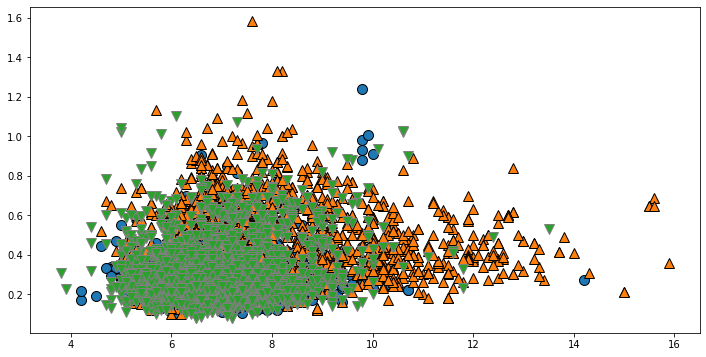

In [48]:
# Run kMeans with 3 clusters on Xw
#Start       
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
# using Xw and yw_mul

fig, axes = plt.subplots(1, 1, figsize=(12, 6))
# using 3 cluster centers:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xw)
assignments = kmeans.labels_
mglearn.discrete_scatter(Xw[:, 0], Xw[:, 1], assignments, ax=axes)

#END

#assignments = kmeans.labels_plt.scatter(Xw[:, 0], Xw[:, 1], c=assignments)
#mglearn.discrete_scatter(Xw[:, 0], Xw[:, 1], assignments, ax=axes[0])


In [50]:
Xw.shape

(6497, 10)

In [51]:
# First preprocessing by PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
# fit PCA model to breast cancer data
pca.fit(Xw)

# transform data onto the first two principal components
Xw_pca = pca.transform(Xw)
print("Original shape: {}".format(str(Xw.shape)))
print("Reduced shape: {}".format(str(Xw_pca.shape)))


Original shape: (6497, 10)
Reduced shape: (6497, 5)


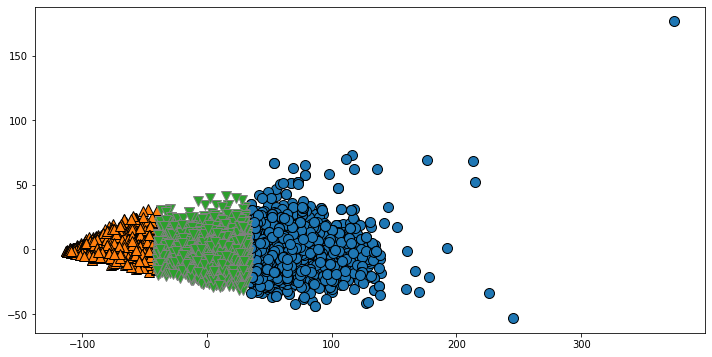

In [52]:
#

fig, axes = plt.subplots(1, 1, figsize=(12, 6))
# using 3 cluster centers:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xw_pca)
assignments = kmeans.labels_
mglearn.discrete_scatter(Xw_pca[:, 0], Xw_pca[:, 1], assignments, ax=axes)


In [ ]:
# So with PCA it is well defined.